# Sentiment Analysis 


In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
from pprint import pprint
import collections
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
import gensim
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
np.random.seed(37)

C:\Users\berni\Nouveau dossier (4)\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\berni\Nouveau dossier (4)\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('Corona_NLP_train.csv',encoding ='latin1',error_bad_lines=False)
test = pd.read_csv('Corona_NLP_test.csv',encoding ='latin1',error_bad_lines=False)

In [5]:
data = df[['OriginalTweet','Sentiment']]
data['index'] = data.index
documents = data

data_test = test[['OriginalTweet','Sentiment']]
data_test['index'] = data_test.index
documents_test = data_test

In [4]:
print(len(documents))
print(documents[:5])

41157
                                                                                                                                                                                                                                                                                                                        OriginalTweet  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8                                                                                                                                                                                                                      
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order                                                                                        
2  Coro

## Bag of words 

Presence ou non des tokens 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
x_train_dtm = bow.fit_transform(documents['OriginalTweet'])# this is a bow of data which contains presence or not of all tokens we have
x_train_dtm.shape

(41157, 80424)

In [6]:
# instantiate the vectorizer
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.9, max_features=200)
x_train_dtm = vect.fit_transform(documents['OriginalTweet']).toarray()
# x_test_dtm = vect.transform(x_test)
x_train_dtm.shape

(41157, 14)

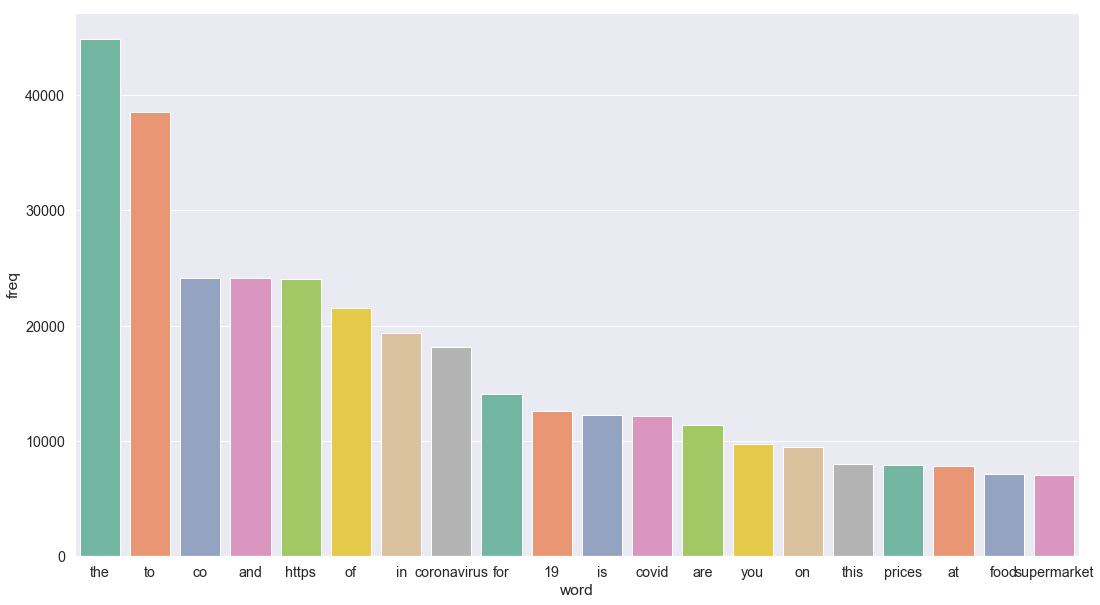

In [7]:
cv = CountVectorizer()
bow = cv.fit_transform(documents['OriginalTweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Set2", ax=ax)
plt.show();

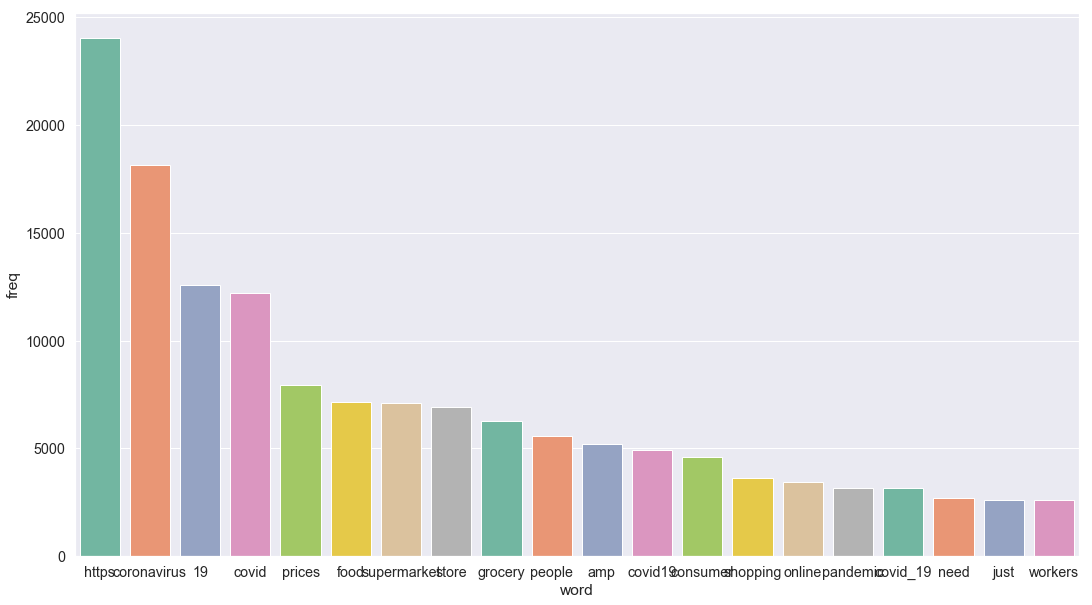

In [8]:
cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(documents['OriginalTweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Set2", ax=ax)
plt.show();

### Faire ce même graphique pour les trois sentiments des tweets. positif, négatif et neutre 

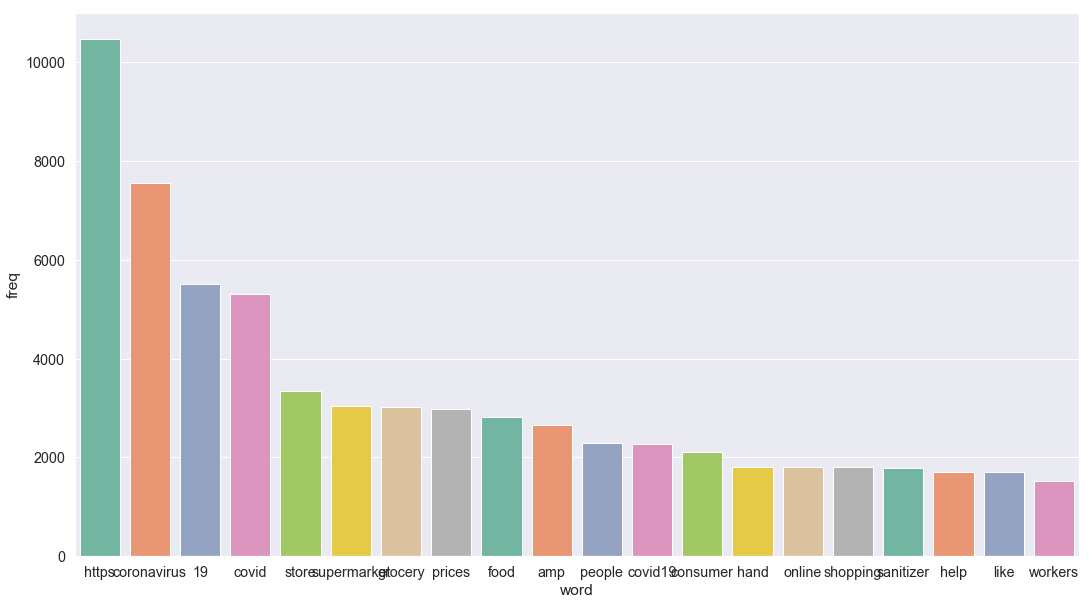

In [9]:
data_po = documents.loc[documents.Sentiment.isin(['Positive','Extremely Positive'])]
cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(data_po['OriginalTweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Set2", ax=ax)
plt.show();

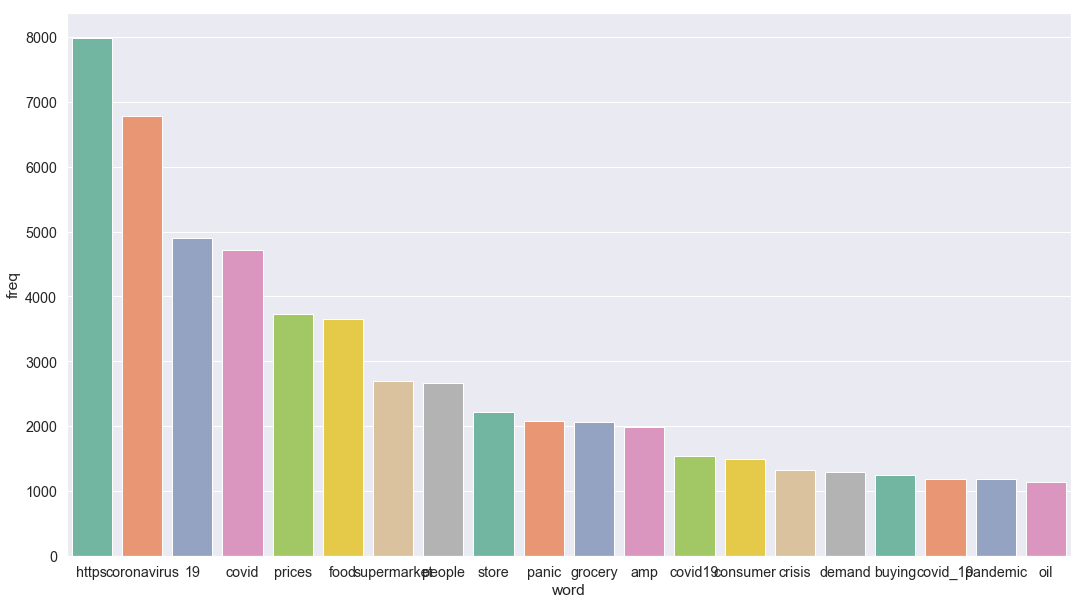

In [10]:
data_ne = documents.loc[documents.Sentiment.isin(['Negative','Extremely Negative'])]
cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(data_ne['OriginalTweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Set2", ax=ax)
plt.show();

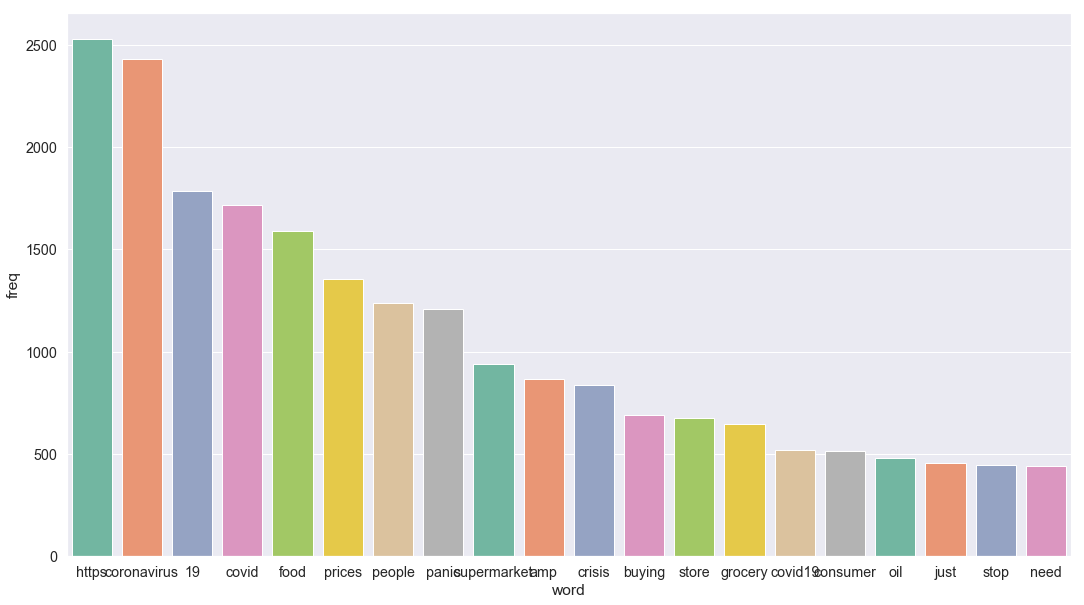

In [11]:
data_Exne = documents[documents['Sentiment']== 'Extremely Negative']
cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(data_Exne['OriginalTweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Set2", ax=ax)
plt.show();

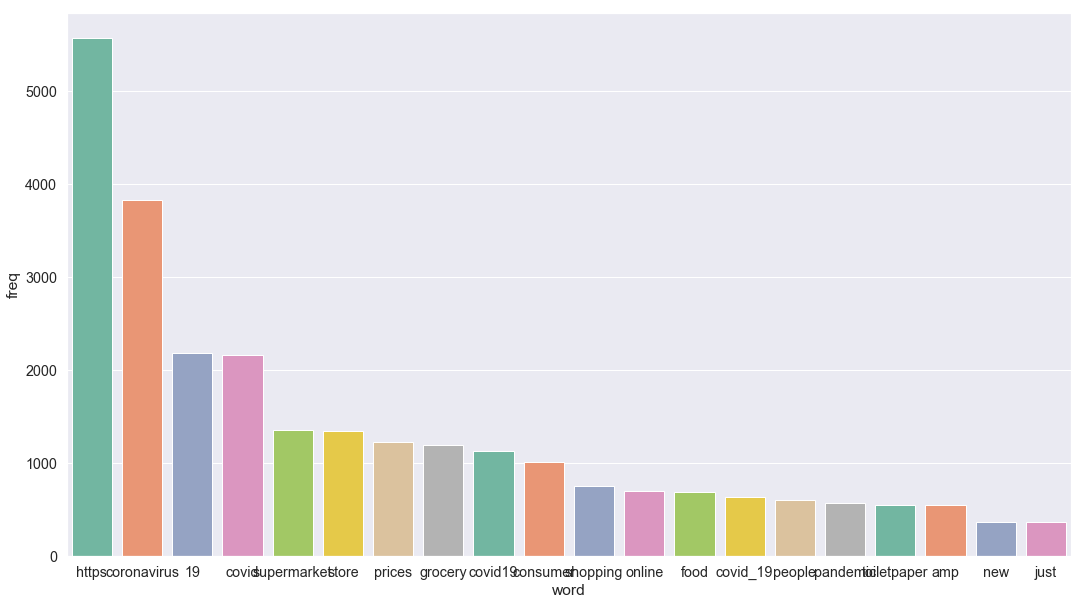

In [12]:
data_neut = documents[documents['Sentiment']== 'Neutral']
cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(data_neut['OriginalTweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="Set2", ax=ax)
plt.show();

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='saga', max_iter=5000)
lr.fit(x_tarin, y_train)

NameError: name 'x_tarin' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf



# sentiment analysis with medium story

In [7]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                          
                          })
        
        return df
tc = TextCounts()
df_eda = tc.fit_transform(documents.OriginalTweet)
df_eda['sentiment'] = documents.Sentiment

df_eda_test = tc.fit_transform(documents_test.OriginalTweet)
df_eda_test['sentiment'] = documents_test.Sentiment

In [15]:
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)  
    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

In [16]:
ct = CleanText()
sr_clean = ct.fit_transform(documents['OriginalTweet'])
sr_clean.sample(5)

2978     wish hoarder would stop stop go groceri store buy everyth peopl need eat houston tx becom everi man citi take care nine kid find necess town                                                   
29406    rest go okay stayathom staysaf inspir mahfwork creativ agenc red peach toiletpap toiletpapercrisi panicbuy instaart cartoon covid cov coronaviru illustr viru creativ rest stophoard digitalart
6156     struggl find food supermarket not tri savouri slice base mix amp match fresh frozen veggi find time tough mean creativ pantri                                                                  
10462    wuhan coronaviru covid continu spread across america panic strickenâ citizen buy item left right shopper hoard food clean suppli butâ not product disinfectâ                                   
11989    went groceri store first time week bizarr experi empti shelv everywher no egg chicken beef milk whatâ go like week coronaviru                                                             

In [9]:
df_eda.to_csv('data_eda.csv', index = False )
df_eda_test.to_csv('data_eda_test.csv',index =False)

In [18]:
df_eda

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,sentiment
0,17,3,0,0,0,3,Neutral
1,38,0,0,1,0,0,Positive
2,18,0,0,1,0,1,Positive
3,46,0,7,8,0,1,Positive
4,45,0,6,0,0,1,Extremely Negative
...,...,...,...,...,...,...,...
41152,16,0,2,2,0,1,Neutral
41153,23,0,0,2,1,0,Extremely Negative
41154,19,2,2,0,2,0,Positive
41155,18,0,3,0,1,0,Neutral


In [8]:
df_eda_test

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,sentiment
0,31,0,1,1,0,2,Extremely Negative
1,36,0,2,0,4,1,Positive
2,12,0,1,0,1,0,Extremely Positive
3,45,0,11,2,1,2,Negative
4,29,0,11,0,0,1,Neutral
...,...,...,...,...,...,...,...
3793,19,0,1,0,1,1,Positive
3794,40,0,0,2,1,1,Negative
3795,29,2,0,0,0,1,Neutral
3796,28,0,1,0,2,0,Extremely Negative


In [287]:
df_model = df_eda
df_model['clean_text'] = sr_clean
df_model.columns.tolist()

['count_words',
 'count_mentions',
 'count_hashtags',
 'count_capital_words',
 'count_excl_quest_marks',
 'count_urls',
 'sentiment',
 'clean_text']

In [289]:
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols    
    def transform(self, X, **transform_params):
        return X[self.cols]
    def fit(self, X, y=None, **fit_params):
        return self

X_train, X_test, y_train, y_test = train_test_split(df_model.drop('sentiment', axis=1), df_model.sentiment, test_size=0.1, random_state=37)

In [290]:
# Based on http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
def grid_vect(clf, parameters_clf, X_train, X_test, parameters_text=None, vect=None, is_w2v=False):
    
    textcountscols = ['count_capital_words','count_emojis','count_excl_quest_marks','count_hashtags'
                      ,'count_mentions','count_urls','count_words']
    
    if is_w2v:
        w2vcols = []
        for i in range(SIZE):
            w2vcols.append(i)
        features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                                 , ('w2v', ColumnExtractor(cols=w2vcols))]
                                , n_jobs=-1)
    else:
        features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                                 , ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text')), ('vect', vect)]))]
                                , n_jobs=-1)    
    pipeline = Pipeline([
        ('features', features)
        , ('clf', clf)
    ])
    
    # Join the parameters dictionaries together
    parameters = dict()
    if parameters_text:
        parameters.update(parameters_text)
    parameters.update(parameters_clf)    # Make sure you have scikit-learn version 0.19 or higher to use multiple scoring metrics
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)  
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()  
    print("Best CV score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    print("Test score with best_estimator_: %0.3f" % grid_search.best_estimator_.score(X_test, y_test))
    print("\n")
    print("Classification Report Test Data")
    print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))
                        
    return grid_search

In [291]:
# Parameter grid settings for the vectorizers (Count and TFIDF)
parameters_vect = {
    'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
    'features__pipe__vect__ngram_range': ((1, 1), (1, 2)),
    'features__pipe__vect__min_df': (1,2)
}
# Parameter grid settings for MultinomialNB
parameters_mnb = {
    'clf__alpha': (0.25, 0.5, 0.75)
}
# Parameter grid settings for LogisticRegression
parameters_logreg = {
    'clf__C': (0.25, 0.5, 1.0),
    'clf__penalty': ('l1', 'l2')
}

In [292]:
mnb = MultinomialNB()
logreg = LogisticRegression()

## Words embeddings 

In [298]:
import gensim
from gensim.models import word2vec

corpus = [
          'Text of the first document.',
          'Text of the second document made longer.',
          'Number three.',
          'This is number four.',
]
# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in corpus]
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)

In [301]:
df_eda

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,sentiment,clean_text
0,17,3,0,0,0,3,Neutral,
1,38,0,0,1,0,0,Positive,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med not order
2,18,0,0,1,0,1,Positive,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak
3,46,0,7,8,0,1,Positive,food stock not one empti pleas panic enough food everyon not take need stay calm stay safe covidfr covid covid coronaviru confin confinementot confinementgener
4,45,0,6,0,0,1,Extremely Negative,readi go supermarket covid outbreak not paranoid food stock litterali empti coronaviru seriou thing pleas panic caus shortag coronavirusfr restezchezv stayathom confin
...,...,...,...,...,...,...,...,...
41152,16,0,2,2,0,1,Neutral,airlin pilot offer stock supermarket shelv nz lockdown covid
41153,23,0,0,2,1,0,Extremely Negative,respons complaint not provid cite covid relat delay yet prompt reject polici consum tat way go
41154,19,2,2,0,2,0,Positive,know itâ get tough ration toilet paper coronaviru toiletpap martinsvil help us
41155,18,0,3,0,1,0,Neutral,wrong smell hand sanit start turn coronaviru covid coronaviru
